# Image processing.

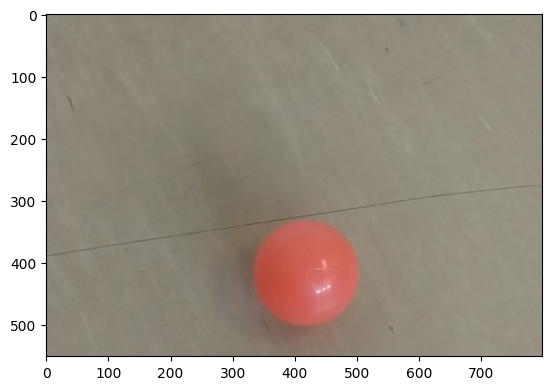

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

ball = plt.imread('ball.png')
plt.imshow(ball)

## Convertion from RGB to HSV color-space.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


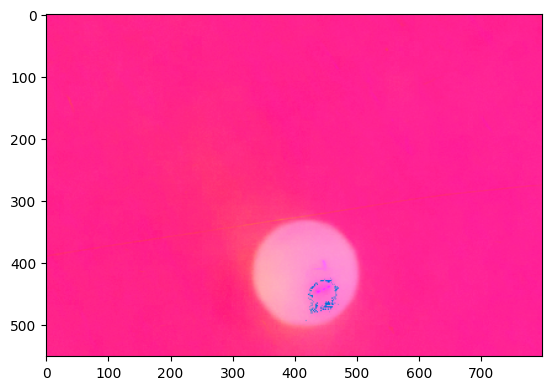

In [2]:
hsv = cv.cvtColor(ball, cv.COLOR_RGB2HSV)

plt.imshow(hsv)

## Creation of image mask for color RED.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


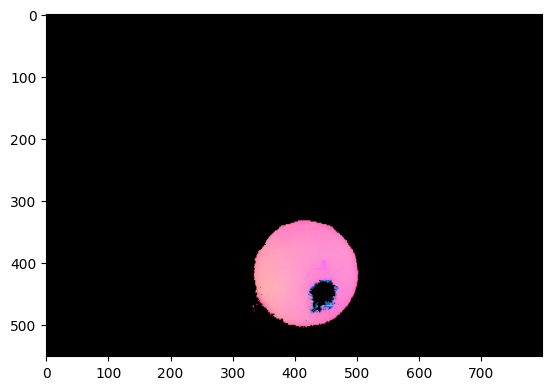

In [3]:
lower = np.array([0,0,0])
upper = np.array([10,255,255])

mask = cv.inRange(hsv, lower, upper)

obj = cv.bitwise_and(hsv, hsv, mask=mask)

plt.imshow(obj, cmap='gray')

## Removing noise on object using morphological operand called 'opening' (erosion followed by dilation).

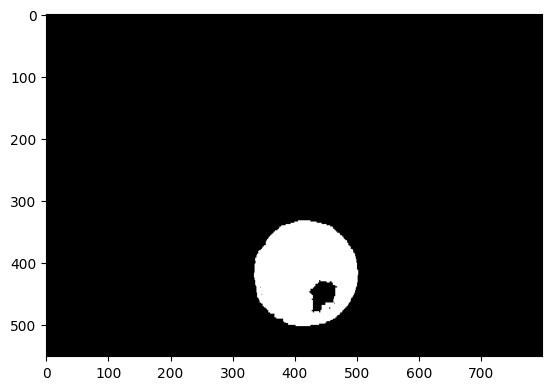

In [4]:
kernel = np.ones((5,5),np.uint8)

opening = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

plt.imshow(opening, cmap='gray')

## Adding a center marker to the object.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


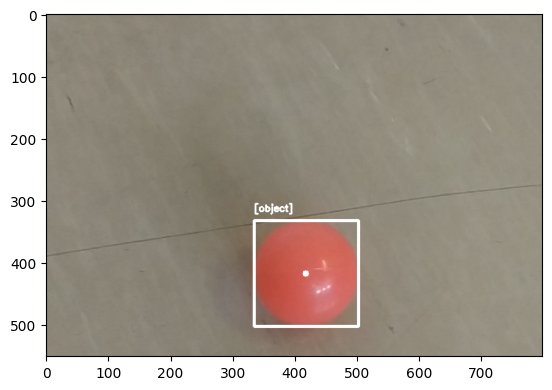

In [5]:
contours, _ = cv.findContours(opening, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for c in contours:
  M = cv.moments(c)
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
  x, y, w, h = cv.boundingRect(c)
  cv.rectangle(ball, (x, y), (x + w, y + h), (255, 255, 255), 3)
  cv.circle(ball, (cX, cY), 5, (255, 255, 255), -1)
  cv.putText(ball, "[object]", (x, y-15), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)


plt.imshow(ball)

# Video processing.

## Set up the environment.

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

## For excercise 2 (movingball).

In [7]:
cap = cv2.VideoCapture('movingball.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
kernel = np.ones((5,5),np.uint8)
out = cv2.VideoWriter('tracked_movingball.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
lower = np.array([0,60,0])
upper = np.array([10,255,255])

## For excercise 3 (custom video).

In [4]:
cap = cv2.VideoCapture('paprika.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
kernel = np.ones((5,5),np.uint8)
out = cv2.VideoWriter('tracked_paprika.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
lower = np.array([0,80,0])
upper = np.array([10,255,255])

## Verified if capture is open.

In [13]:
cap.isOpened()

True

## Created a bounding function to draw countours around the object.

In [14]:
def draw_bound(hsv, frame):
  mask = cv2.inRange(hsv, lower, upper)

  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    M = cv2.moments(largest_contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)
    cv2.circle(frame, (cX, cY), 5, (255, 255, 255), -1)
    cv2.putText(frame, "[object]", (x, y-15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

  return frame


## Edited every frame in captured video.

In [15]:
while True:
  ret, frame = cap.read()
  if not ret:
    break
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  frame = draw_bound(hsv, frame)

  out.write(frame)


cap.release()
out.release()
cv2.destroyAllWindows()